In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import contextily as cx
import imageio as iio
from pygifsicle import optimize

In [6]:
gdf = gpd.read_file("./isochrones.geojson")
gdf = gdf.set_crs("EPSG:4326")
points = gpd.read_file("./points.geojson").set_crs("EPSG:4326").to_crs("EPSG:3857")

In [7]:
gdf["time"] = pd.to_datetime(gdf["time"])

In [8]:
bbox = gdf.geometry.total_bounds
for ix, (name, group) in enumerate(gdf.to_crs("EPSG:3857").sort_values("time").groupby("time")):
        fig, ax = plt.subplots(1,1, figsize=(15,20))
        img, ext = cx.bounds2img(*bbox, ll=True)
        _ = ax.imshow(img, extent=ext)
        _ = ax.axis("off")
        group.plot(ax=ax)
        points.plot(ax=ax, color="red")
        ax.set_title(f"{name}")
        fig.tight_layout()
        plt.savefig(f"./img/frame_{ix}.jpg", dpi=30)
        plt.close(fig)

In [9]:
with iio.get_writer("./valhalla.gif", mode="I") as writer:
    for i in range(ix):
        writer.append_data(iio.imread(f"./img/frame_{i}.jpg"))

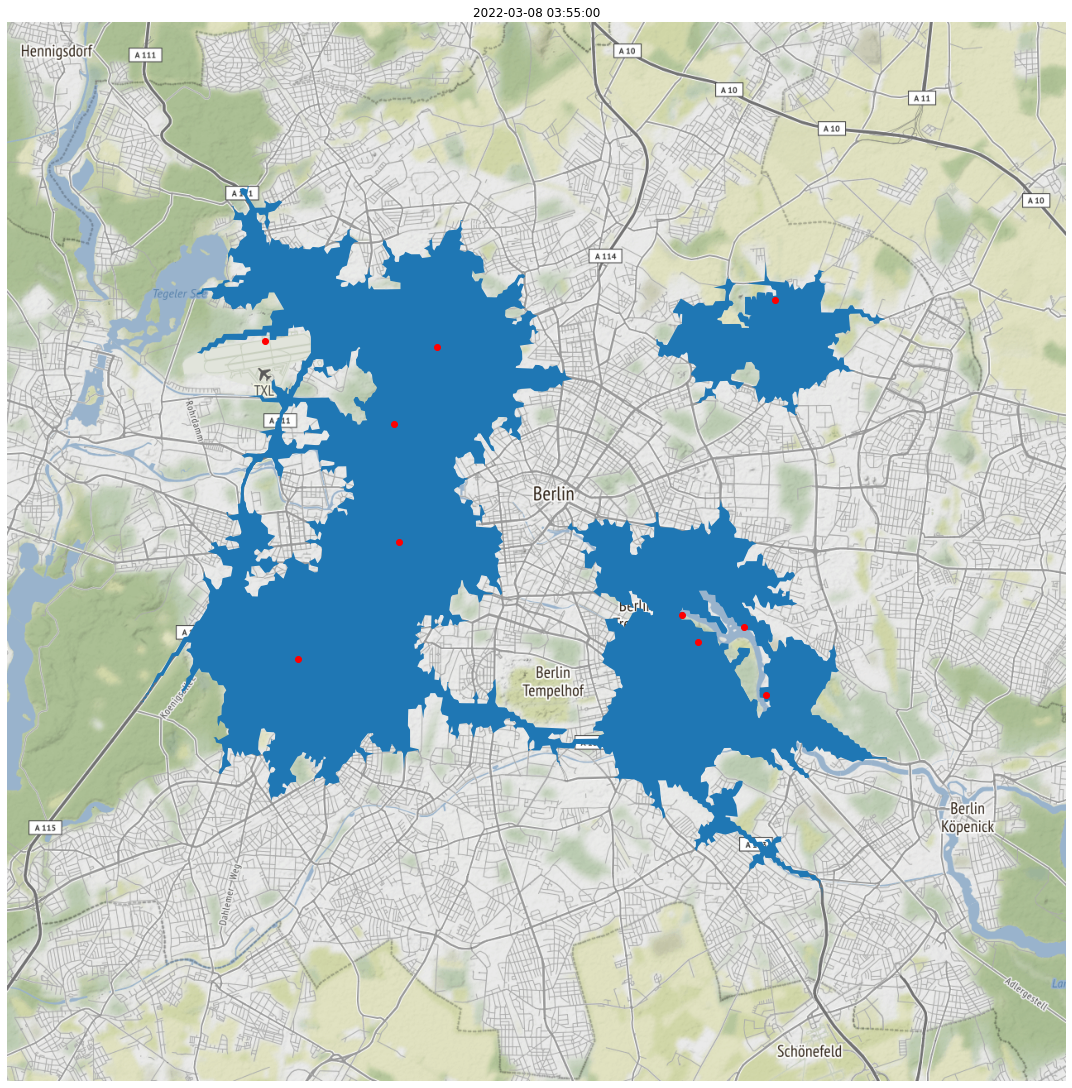

In [38]:
fig